### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model.

# 1Q

## Delivery time -> Predict delivery time using sorting time

In [1]:
# importing libraries
import pandas as pd, numpy as np
from scipy import stats
import matplotlib.pyplot as plt, seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the file
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Performing EDA on the data

In [3]:
 # to get the information of the datafile
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
# summarizing the datafile
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
print("Dimensions -",data.shape)
print("Column names -",data.columns)

Dimensions - (21, 2)
Column names - Index(['Delivery Time', 'Sorting Time'], dtype='object')


In [6]:
# to check the null values of the data
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
# renaming the columns
data = data.rename({'Delivery Time':'DT','Sorting Time':'ST'},axis='columns')
data.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


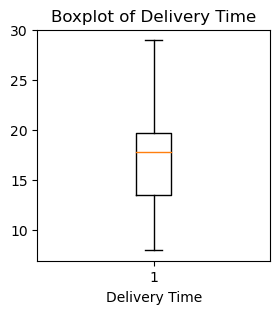

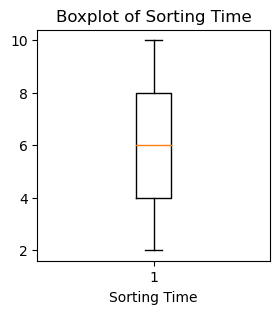

In [8]:
# checking for outliers in the data
plt.figure(figsize=(3,3))
plt.boxplot(data['DT'])
plt.title("Boxplot of Delivery Time")
plt.xlabel('Delivery Time')
plt.show()

plt.figure(figsize=(3,3))
plt.boxplot(data['ST'])
plt.title("Boxplot of Sorting Time")
plt.xlabel('Sorting Time')
plt.show()

Therefore, there are no outliers in the data.

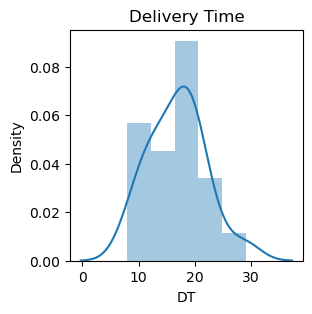

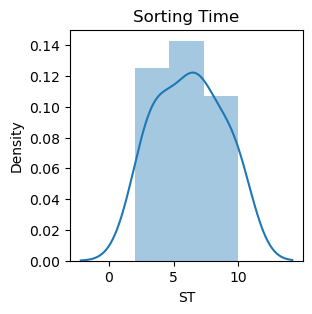

In [9]:
# Distribution plot
plt.figure(figsize=(3,3))
sns.distplot(data['DT'])
plt.title("Delivery Time")
plt.show()

plt.figure(figsize=(3,3))
sns.distplot(data['ST'])
plt.title("Sorting Time")
plt.show()

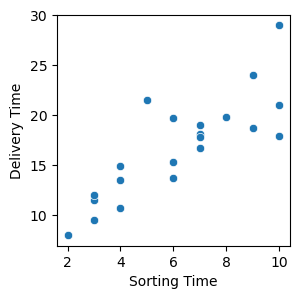

In [10]:
# plotting the scatter plot to know the relation between variables
plt.figure(figsize=(3,3))
sns.scatterplot(x=data['ST'],y=data['DT'])
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

## Checking the correlation between the two variables (columns)

In [11]:
data.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


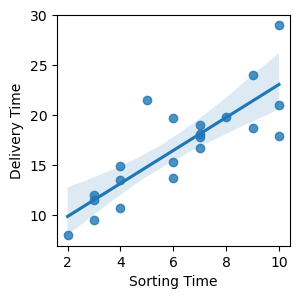

In [12]:
# Visualisation of the correlation bertween delivery time and sorting time
plt.figure(figsize=(3,3))
sns.regplot(x=data['ST'],y=data['DT'])
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

## Simple Linear Regression Model

The equation would be,

Delivery time = B0 + B1(Sorting time)

In [13]:
import statsmodels.formula.api as smf
model = smf.ols('DT~ST',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        01:54:01   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# to find the residuals in the data model
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [15]:
# Prediction of the target variable using independent variable
pred = model.predict(data.ST)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [16]:
# to find the total error in the model
rmse = np.sqrt(np.mean((np.array(data.DT)-np.array(pred))**2))
rmse

2.7916503270617654

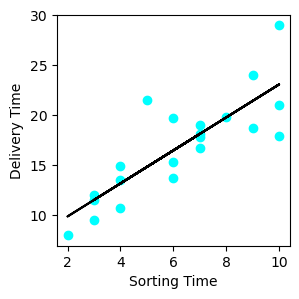

In [17]:
# plotting the actual and predicted values
plt.figure(figsize=(3,3))
plt.scatter(x=data.ST,y=data.DT,color='cyan')
plt.plot(data.ST,pred,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

## Applying Transformations to the Data

### Log transformation

The equation would be,

Delivery time = B0 + B1 log(Sorting time)

In [18]:
# Applying log transformation
model1 = smf.ols('DT~np.log(ST)',data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        01:54:01   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# for predicting target values and for finding total error in the model
pred1 = model1.predict(data.ST)
rmse_log = np.sqrt(np.mean((np.array(data.DT)-np.array(pred1))**2))
rmse_log

2.733171476682066

### Square root transformation

The equation would be,

Delivery time = B0 + B1 sqrt(Sorting time)

In [20]:
# Applying square root transformation
model2 = smf.ols('DT~np.sqrt(ST)',data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           2.61e-06
Time:                        01:54:01   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(ST)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# for predicting target values and for finding total error in the model
pred2 = model2.predict(data.ST)
rmse_sqrt = np.sqrt(np.mean((np.array(data.DT)-np.array(pred2))**2))
rmse_sqrt

2.7315432100912105

### Cube root transformation 

The equation would be,

Delivery time = B0 + B1 cbrt(Sorting time)

In [22]:
# Applying cube root transformation
model3 = smf.ols('DT~np.cbrt(ST)',data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     43.79
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           2.48e-06
Time:                        01:54:02   Log-Likelihood:                -50.844
No. Observations:                  21   AIC:                             105.7
Df Residuals:                      19   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -11.5792      4.332     -2.673      0.015     -20.647      -2.511
np.cbrt(ST)    15.7673      2.383      6.618      0.000      10.780      20.754
==============================================================================
Omnibus:                        4.963   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.050
Skew:                           0.896   Prob(JB):                        0.218
Kurtosis:                       3.525   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# for predicting target values and for finding total error in the model
pred3 = model3.predict(data.ST)
rmse_cbrt = np.sqrt(np.mean((np.array(data.DT)-np.array(pred3))**2))
rmse_cbrt

2.724296018597873

### Exponential Transformation 

The equation would be,

DT = exp(B0 + B1(ST))

log(Delivery time) = B0 + B1(Sorting time)

In [24]:
# Applying exponential transformation
model4 = smf.ols('np.log(DT)~ST',data=data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           1.59e-06
Time:                        01:54:02   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# for predicting target values and for finding total error in the model
pred4 = model4.predict(data.ST)
rmse_exp = np.sqrt(np.mean((np.array(data.DT)-np.array(np.exp(pred4)))**2))
rmse_exp

2.940250323056201

### Combination of Log and Quadratic Transformations

The equation would be,

log(Delivery time) = B0 + B1(Sorting time) + B2(Sorting time)^2

In [26]:
# adding the column ST**2 in to the data
data['ST_sq'] = data.ST**2
data.head()

,DT,ST,ST_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [27]:
# Appling log in quadratic equation
model5 = smf.ols('np.log(DT)~ST+ST_sq',data=data).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           2.20e-06
Time:                        01:54:02   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
ST             0.2659      0.080      3.315      0.004       0.097       0.434
ST_sq         -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Prediction of the target variable using independent variable
pred5 = np.exp(model5.predict(data))
pred5.head()

0    21.646921
1    12.909227
2    16.995933
3    21.176938
4    21.646921
dtype: float64

In [29]:
# to find the total error in the model
rmse_quad = np.sqrt(np.mean((np.array(data.DT)-np.array(pred5))**2))
rmse_quad

2.799041988740925

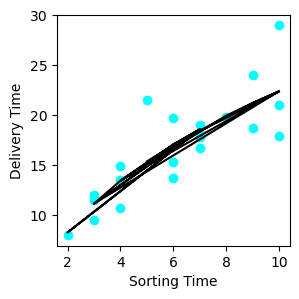

In [30]:
# plotting the actual and predicted values
plt.figure(figsize=(3,3))
plt.scatter(x=data.ST,y=data.DT,color='cyan')
plt.plot(data.ST,pred3,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

### Model Validation

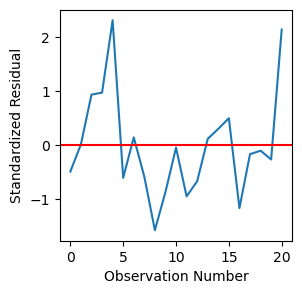

In [31]:
# plotting the standardized residual w.r.t no. of observations
plt.figure(figsize=(3,3))
plt.plot(np.arange(len(data)),model3.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")
plt.show()

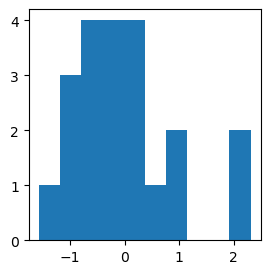

In [32]:
# plotting the standardized residuals
plt.figure(figsize=(3,3))
plt.hist(model3.resid_pearson)
plt.show()

In [33]:
val = {"Model":pd.Series(["Linear","Log","Sqrt","Cbrt","Exp","Quad"]),
        "RMSE_val":pd.Series([rmse,rmse_log,rmse_sqrt,rmse_cbrt,rmse_exp,rmse_quad]),
        "RSquare":pd.Series([model.rsquared,model1.rsquared,
                             model2.rsquared,model3.rsquared,
                             model4.rsquared,model5.rsquared])}
table = pd.DataFrame(val)
table

,Model,RMSE_val,RSquare
0,Linear,2.791650,0.682271
1,Log,2.733171,0.695443
2,Sqrt,2.731543,0.695806
3,Cbrt,2.724296,0.697418
4,Exp,2.940250,0.710948
5,Quad,2.799042,0.764867


##### Since the R-squared value in the Quadratic model is greater than 75%, we can take this model as best fit model for the prediction of dependent variable(Delivery time) using independent variable(Sorting time).

###### The following is the data with actual and predicted values of the dependent variable(Delivery time).

In [34]:
data['Predicted DT'] = pred5
data[['DT','Predicted DT']]

,DT,Predicted DT
0,21.00,21.646921
1,13.50,12.909227
2,19.75,16.995933
3,24.00,21.176938
4,29.00,21.646921
5,15.35,16.995933
6,19.00,18.764526
7,9.50,10.825502
8,17.90,21.646921
9,18.75,21.176938


# 2Q

## Salary_hike -> Build a prediction model for Salary_hike

In [35]:
# importing libraries
import pandas as pd, numpy as np
from scipy import stats
import matplotlib.pyplot as plt, seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [36]:
# reading the file
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Performing EDA on the data file

In [37]:
# to get the information of the datafile
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [38]:
# summarizing the datafile
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [39]:
print("Dimensions -",df.shape)
print("Column names -",df.columns)

Dimensions - (30, 2)
Column names - Index(['YearsExperience', 'Salary'], dtype='object')


In [40]:
# to check the null values of the data
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [41]:
# renaming the columns
df1 = df.rename({'YearsExperience':'Exp','Salary':'Sal'},axis='columns')
df1.head()

,Exp,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


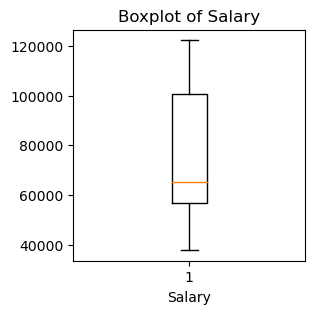

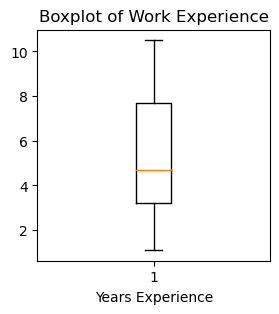

In [42]:
# checking for outliers in the data
plt.figure(figsize=(3,3))
plt.boxplot(df['Salary'])
plt.title("Boxplot of Salary")
plt.xlabel('Salary')
plt.show()

plt.figure(figsize=(3,3))
plt.boxplot(df['YearsExperience'])
plt.title("Boxplot of Work Experience")
plt.xlabel('Years Experience')
plt.show()

Hence, there are no outliers in the data

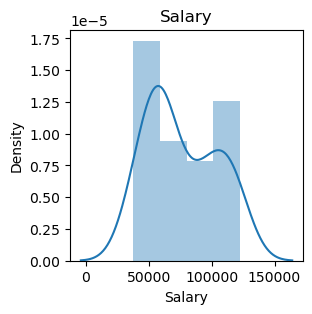

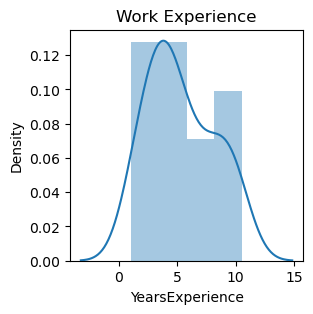

In [43]:
# Distribution plot
plt.figure(figsize=(3,3))
sns.distplot(df['Salary'])
plt.title("Salary")
plt.show()

plt.figure(figsize=(3,3))
sns.distplot(df['YearsExperience'])
plt.title("Work Experience")
plt.show()

## Checking the correlation between the two variables (columns)

In [44]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


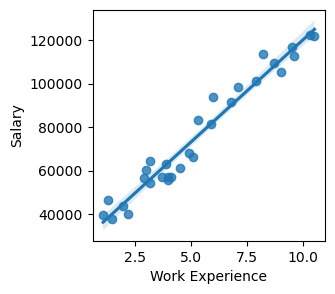

In [45]:
# Visualisation of the correlation bertween Salary and Years Experience 
plt.figure(figsize=(3,3))
sns.regplot(x=df['YearsExperience'],y=df['Salary'])
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.show()

## Simple Linear Regression Model

In [46]:
import statsmodels.formula.api as smf
s_model = smf.ols('Salary~YearsExperience',data=df).fit()
s_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        01:54:03   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# R square values
s_model.rsquared,s_model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [48]:
# to find the residuals in the data model
s_model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [49]:
# to predict the target value
predict = s_model.predict(df.YearsExperience)
predict.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

In [50]:
# to find the total error in the model
rmse_lin = np.sqrt(np.mean((np.array(df.Salary)-np.array(predict))**2))
rmse_lin

5592.043608760662

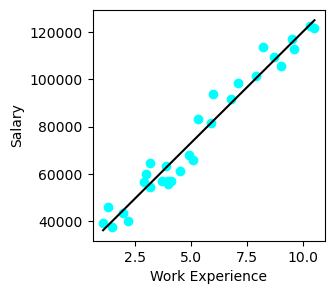

In [51]:
# plotting the actual and predicted values
plt.figure(figsize=(3,3))
plt.scatter(x=df.YearsExperience,y=df.Salary,color='cyan')
plt.plot(df.YearsExperience,predict,color='black')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.show()

## Applying Transformations to the data

### Log Transformation 

The equation would be,

Salary = B0 + B1 log(YearsExperience)

In [52]:
s_model1 = smf.ols('Salary~np.log(YearsExperience)',data=df).fit()
s_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           3.25e-13
Time:                        01:54:03   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# to predict the target value
predict1 = s_model1.predict(df.YearsExperience)
print(predict1.head())
# to find the total error in the model
rmse_1 = np.sqrt(np.mean((np.array(df.Salary)-np.array(predict1))**2))
print('\nRMSE value: ',rmse_1)

0    18795.848339
1    25575.235192
2    31382.551905
3    43057.262306
4    46925.138875
dtype: float64

RMSE value:  10302.893706228308


### Square root transformation 

The equation would be,

Salary = B0 + B1 sqrt(YearsExperience)

In [54]:
s_model2 = smf.ols('Salary~np.sqrt(YearsExperience)',data=df).fit()
s_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           8.57e-18
Time:                        01:54:03   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# to predict the target value
predict2 = s_model2.predict(df.YearsExperience)
print(predict2.head())
# to find the total error in the model
rmse_2 = np.sqrt(np.mean((np.array(df.Salary)-np.array(predict2))**2))
print('\nRMSE value: ',rmse_2)

0    27470.511884
1    31262.287009
2    34771.976586
3    42635.056211
4    45499.687794
dtype: float64

RMSE value:  7080.09573498304


### Cube root transformation

The equation would be,

Salary = B0 + B1 cbrt(YearsExperience)

In [56]:
s_model3 = smf.ols('Salary~np.cbrt(YearsExperience)',data=df).fit()
s_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     287.7
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           2.91e-16
Time:                        01:54:03   Log-Likelihood:                -312.29
No. Observations:                  30   AIC:                             628.6
Df Residuals:                      28   BIC:                             631.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -5.705e+04   7989.534     -7.141      0.000   -7.34e+04   -4.07e+04
np.cbrt(YearsExperience)  7.896e+04   4655.395     16.962      0.000    6.94e+04    8.85e+04
==============================================================================
Omnibus:                        0.462   Durbin-Watson:                   0.811
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.575
Skew:                           0.047   Prob(JB):                        0.750
Kurtosis:                       2.328   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# to predict the target value
predict3 = s_model3.predict(df.YearsExperience)
print(predict3.head())
# to find the total error in the model
rmse_3 = np.sqrt(np.mean((np.array(df.Salary)-np.array(predict3))**2))
print('\nRMSE value: ',rmse_3)

0    24463.801275
1    29131.601199
2    33342.086479
3    42439.314513
4    45650.825046
dtype: float64

RMSE value:  8027.035983458383


### Square root on both variables transformation

The equation would be,

sqrt(Salary) = B0 + B1 sqrt(YearsExperience)

In [58]:
s_model4 = smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)',data=df).fit()
s_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           7.58e-19
Time:                        01:54:03   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# to predict the target value
predict4 = np.square(s_model4.predict(df.YearsExperience))
print(predict4.head())
# to find the total error in the model
rmse_4 = np.sqrt(np.mean((np.array(df.Salary)-np.array(predict4))**2))
print('\nRMSE value: ',rmse_4)

0    33447.371655
1    36022.521569
2    38491.193991
3    44318.949727
4    46544.135171
dtype: float64

RMSE value:  5960.647096174311


## Model Validation

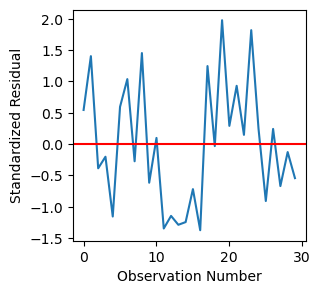

In [60]:
# plotting the standardized residual w.r.t no. of observations
plt.figure(figsize=(3,3))
plt.plot(np.arange(len(df)),s_model.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")
plt.show()

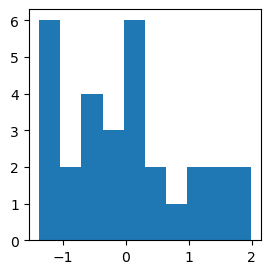

In [61]:
# plotting the standardized residuals
plt.figure(figsize=(3,3))
plt.hist(s_model.resid_pearson)
plt.show()

In [62]:
val1 = {"Model":pd.Series(["Linear","Log","Sqrt","Cbrt","Sqrt_2var"]),
        "RMSE_val":pd.Series([rmse_lin,rmse_1,rmse_2,rmse_3,rmse_4]),
        "RSquare":pd.Series([s_model.rsquared,s_model1.rsquared,
                             s_model2.rsquared,s_model3.rsquared,s_model4.rsquared])}
table1 = pd.DataFrame(val1)
table1

,Model,RMSE_val,RSquare
0,Linear,5592.043609,0.956957
1,Log,10302.893706,0.853889
2,Sqrt,7080.095735,0.931001
3,Cbrt,8027.035983,0.911310
4,Sqrt_2var,5960.647096,0.941949


#### Since the linear model has more than 0.8 r-squared value with less RMSE value than the other models, we can say that this the best fit model.

###### The following is the data with actual and predicted values of the dependent variable(Salary).

In [63]:
df['Predicted Salary'] = predict
df[['Salary','Predicted Salary']]

,Salary,Predicted Salary
0,39343.0,36187.158752
1,46205.0,38077.151217
2,37731.0,39967.143681
3,43525.0,44692.124842
4,39891.0,46582.117306
5,56642.0,53197.090931
6,60150.0,54142.087163
7,54445.0,56032.079627
8,64445.0,56032.079627
9,57189.0,60757.060788
